# A simple buy and hold strategy

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('eurusd.csv', parse_dates=['Date'], index_col='Date')
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
import numpy as np
df["returns"] = np.log(df.price / df.price.shift(1))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [5]:
df = df.dropna()

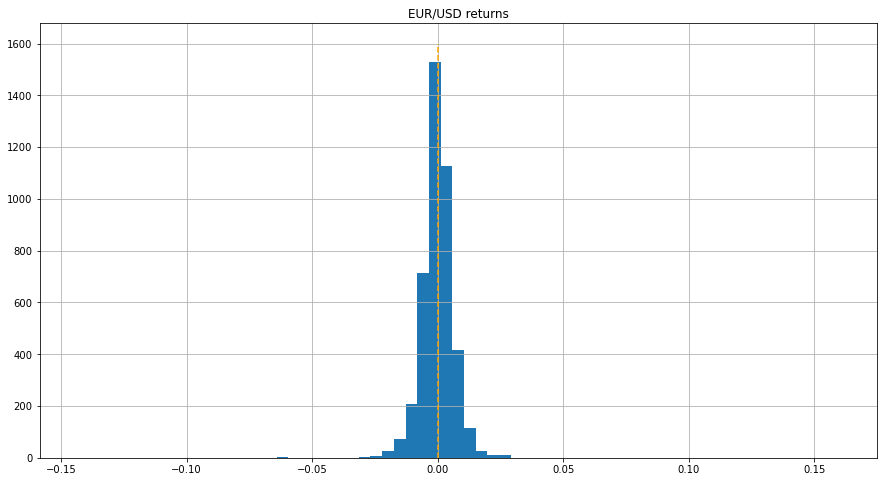

In [6]:
import matplotlib.pyplot as plt

# plot histogram of returns
df.returns.hist(bins = int(np.sqrt(len(df.index))), figsize=(15, 8))
plt.title('EUR/USD returns')
plt.vlines(x=0, ymin=0, ymax=1600, ls="--", color="orange")
plt.show()

In [7]:
# get total return
total_log_return = df.returns.sum()
total_log_return

-0.11214302770699758

In [18]:
# This returns the factor of the original value at the end
np.exp(total_log_return)

0.8939163935445148

In [9]:
# get final return
df.price[-1] / df.price[0]

0.8939163935445141

In [11]:
# cumsum shows the intermediary returns because it's a log return!
df.returns.cumsum()

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2020-06-24   -0.106368
2020-06-25   -0.111817
2020-06-26   -0.114379
2020-06-29   -0.114042
2020-06-30   -0.112143
Name: returns, Length: 4274, dtype: float64

In [12]:
# We can apply cumsum of the log return to the exp function to get the asset price at each step
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [15]:
# Cumulative return shows the absolute performance over time
df["creturn"] = df.returns.cumsum().apply(np.exp)
df.head()

/tmp/ipykernel_844/3836322704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["creturn"] = df.returns.cumsum().apply(np.exp)


,price,returns,creturn
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343


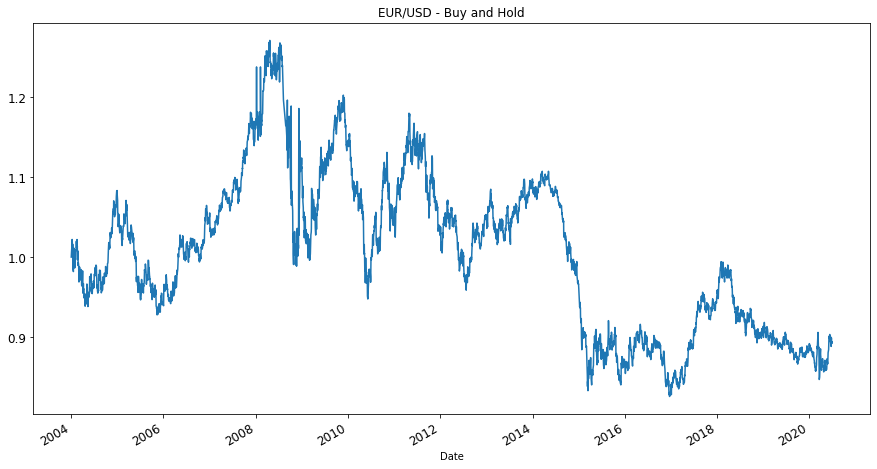

In [14]:
df.creturn.plot(figsize=(15, 8), title='EUR/USD - Buy and Hold' , fontsize=12)
plt.show()

## More performance metrics
- mean/std framework assumes normal distribution of return, but in finance, it is not often the case.

In [20]:
# It ends up with 89.4% of the starting value
df.creturn.iloc[-1]

0.8939163935445149

In [21]:
# Annualized returns / risk
df.returns.mean() * 252

-0.0066120830561917105

In [23]:
df.returns.std() * (np.sqrt(252))

0.12054120479431393

## Maximum drawdown
The difference between the max log return and the current cumulative log return.
- Maximum drawdown is a way to measure extreme risk in the tail end.
- It's the distance between peak and bottom until the new peak is achieved.
- It shows the worst-case risk.

In [26]:
df["cummax"] = df.creturn.cummax()
df

/tmp/ipykernel_844/1653825998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cummax"] = df.creturn.cummax()


,price,returns,creturn,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


<AxesSubplot:title={'center':'EUR/USD - max drawdown'}, xlabel='Date'>

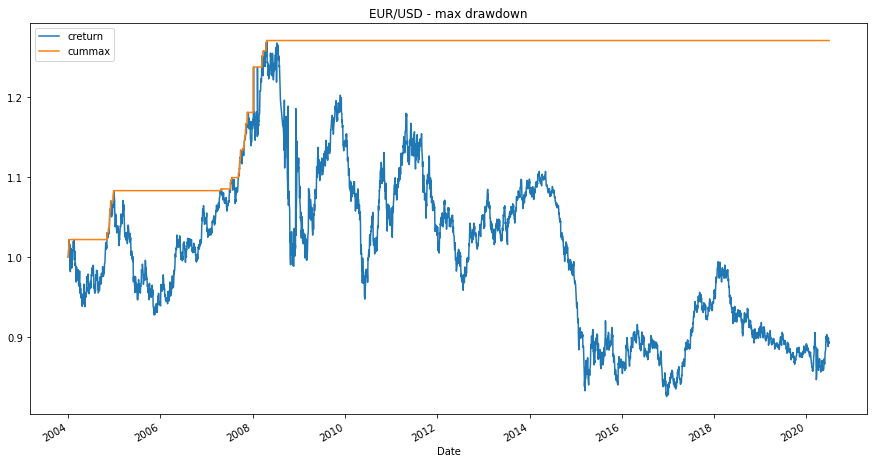

In [30]:
df[["creturn", "cummax"]].dropna().plot(figsize=(15, 8), title="EUR/USD - max drawdown")

In [32]:
drawdown = df["cummax"] - df["creturn"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [33]:
drawdown.max()

0.4448840569933439

In [35]:
# In the worst case, we could lose about 44% on 2016-12-21
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')